In [ ]:
import re
import pandas as pd
import numpy as np
import itertools
# from mlutils import dataset, connector
import scipy.stats
from scipy.stats import *
from sklearn.preprocessing import StandardScaler
import math
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

import statsmodels.api as sm 
import seaborn as sns
import pylab as py
from urllib.error import HTTPError
import pprint
%matplotlib inline

In [ ]:
#Devanshh
columns=['Year','Month','Day','Hour','GHI']
url_prefix_list = ['https://raw.githubusercontent.com/bikashjena2304/Renewable-energy-data/main/Rajasthan1/15396_26.65_71.65_',
                   'https://raw.githubusercontent.com/bikashjena2304/Renewable-energy-data/main/Rajasthan2/21004_26.45_73.35_',
                   'https://raw.githubusercontent.com/bikashjena2304/Renewable-energy-data/main/Rajasthan3/20012_26.25_73.05_',
                   'https://raw.githubusercontent.com/bikashjena2304/Renewable-energy-data/main/Rajasthan4/19019_25.95_72.75_',
                   'https://raw.githubusercontent.com/bikashjena2304/Renewable-energy-data/main/Rajasthan5/17036_25.65_72.15_'
                   ]

In [ ]:
def get_solar_park_dataframe(url_prefix_string):
  df_raw = pd.DataFrame()
  for year in range(2000,2015):
    # print(url_prefix_string + str(year) + '')
    try:
      df_temp = pd.read_csv(url_prefix_string + str(year) + '.csv', skiprows=range(0,2))
      
      if year == 2000:
        df_raw = df_raw.append(df_temp)

      else:
        df_temp = df_temp.iloc[1:]
        df_raw = df_raw.append(df_temp)
    
    except HTTPError:
      continue
  
  return pd.DataFrame(df_raw[columns])

In [ ]:
def get_all_parks_dataframe(url_prefix_list):
  df_list_raw = list()
  for url in url_prefix_list:
    df_list_raw.append(get_solar_park_dataframe(url))

  return df_list_raw

In [ ]:
#Read all datasets

df_list_raw = get_all_parks_dataframe(url_prefix_list)

In [ ]:
df_list = list(df_list_raw)
# df_list = [df[df['Hour'] >= 5] for df in df_list]
# df_list = [df[df['Hour'] <=19 ] for df in df_list]

for df in df_list:
  # df['GHI'] = pd.to_numeric(df['GHI'], downcast='float')
  # df['GHI'] = df['GHI'].replace(0.0,1.0)
  df = df.reset_index(drop=True, inplace=True)

In [ ]:
df_list[0].to_csv()

',Year,Month,Day,Hour,GHI\n0,2000,1,1,0,0\n1,2000,1,1,1,0\n2,2000,1,1,2,0\n3,2000,1,1,3,0\n4,2000,1,1,4,0\n5,2000,1,1,5,0\n6,2000,1,1,6,0\n7,2000,1,1,7,0\n8,2000,1,1,8,135\n9,2000,1,1,9,331\n10,2000,1,1,10,488\n11,2000,1,1,11,608\n12,2000,1,1,12,664\n13,2000,1,1,13,671\n14,2000,1,1,14,584\n15,2000,1,1,15,438\n16,2000,1,1,16,243\n17,2000,1,1,17,42\n18,2000,1,1,18,0\n19,2000,1,1,19,0\n20,2000,1,1,20,0\n21,2000,1,1,21,0\n22,2000,1,1,22,0\n23,2000,1,1,23,0\n24,2000,1,2,0,0\n25,2000,1,2,1,0\n26,2000,1,2,2,0\n27,2000,1,2,3,0\n28,2000,1,2,4,0\n29,2000,1,2,5,0\n30,2000,1,2,6,0\n31,2000,1,2,7,0\n32,2000,1,2,8,124\n33,2000,1,2,9,319\n34,2000,1,2,10,495\n35,2000,1,2,11,602\n36,2000,1,2,12,657\n37,2000,1,2,13,670\n38,2000,1,2,14,585\n39,2000,1,2,15,439\n40,2000,1,2,16,250\n41,2000,1,2,17,44\n42,2000,1,2,18,0\n43,2000,1,2,19,0\n44,2000,1,2,20,0\n45,2000,1,2,21,0\n46,2000,1,2,22,0\n47,2000,1,2,23,0\n48,2000,1,3,0,0\n49,2000,1,3,1,0\n50,2000,1,3,2,0\n51,2000,1,3,3,0\n52,2000,1,3,4,0\n53,2000,1,3,5,0\

In [ ]:
pd.to_datetime(df_list[0][['Year','Month','Day','Hour']])

0        2000-01-01 00:00:00
1        2000-01-01 01:00:00
2        2000-01-01 02:00:00
3        2000-01-01 03:00:00
4        2000-01-01 04:00:00
                 ...        
131381   2014-12-31 19:00:00
131382   2014-12-31 20:00:00
131383   2014-12-31 21:00:00
131384   2014-12-31 22:00:00
131385   2014-12-31 23:00:00
Length: 131386, dtype: datetime64[ns]

In [ ]:
for i in range(5):
  x=df_list[i].isnull().sum()
  print(x)
  print('........\n')

Year     0
Month    0
Day      0
Hour     0
GHI      0
dtype: int64
........

Year     0
Month    0
Day      0
Hour     0
GHI      0
dtype: int64
........

Year     0
Month    0
Day      0
Hour     0
GHI      0
dtype: int64
........

Year     0
Month    0
Day      0
Hour     0
GHI      0
dtype: int64
........

Year     0
Month    0
Day      0
Hour     0
GHI      0
dtype: int64
........



In [ ]:
for df in df_list:
  print(df)

        Year  Month  Day  Hour  GHI
0       2000      1    1     0    0
1       2000      1    1     1    0
2       2000      1    1     2    0
3       2000      1    1     3    0
4       2000      1    1     4    0
...      ...    ...  ...   ...  ...
131381  2014     12   31    19    0
131382  2014     12   31    20    0
131383  2014     12   31    21    0
131384  2014     12   31    22    0
131385  2014     12   31    23    0

[131386 rows x 5 columns]
        Year  Month  Day  Hour  GHI
0       2000      1    1     0    0
1       2000      1    1     1    0
2       2000      1    1     2    0
3       2000      1    1     3    0
4       2000      1    1     4    0
...      ...    ...  ...   ...  ...
131381  2014     12   31    19    0
131382  2014     12   31    20    0
131383  2014     12   31    21    0
131384  2014     12   31    22    0
131385  2014     12   31    23    0

[131386 rows x 5 columns]
        Year  Month  Day  Hour  GHI
0       2000      1    1     0    0
1       20

In [ ]:
for i in range(len(df_list)):
  df2 = pd.DataFrame(pd.to_datetime(df_list[i][['Year','Month','Day','Hour']]), columns=['Timestamp'])
  df2 = df2.join(df_list[i])
  df_list[i] = df2
  
for df in df_list:
  print(df)

                 Timestamp  Year  Month  Day  Hour  GHI
0      2000-01-01 00:00:00  2000      1    1     0    0
1      2000-01-01 01:00:00  2000      1    1     1    0
2      2000-01-01 02:00:00  2000      1    1     2    0
3      2000-01-01 03:00:00  2000      1    1     3    0
4      2000-01-01 04:00:00  2000      1    1     4    0
...                    ...   ...    ...  ...   ...  ...
131381 2014-12-31 19:00:00  2014     12   31    19    0
131382 2014-12-31 20:00:00  2014     12   31    20    0
131383 2014-12-31 21:00:00  2014     12   31    21    0
131384 2014-12-31 22:00:00  2014     12   31    22    0
131385 2014-12-31 23:00:00  2014     12   31    23    0

[131386 rows x 6 columns]
                 Timestamp  Year  Month  Day  Hour  GHI
0      2000-01-01 00:00:00  2000      1    1     0    0
1      2000-01-01 01:00:00  2000      1    1     1    0
2      2000-01-01 02:00:00  2000      1    1     2    0
3      2000-01-01 03:00:00  2000      1    1     3    0
4      2000-01-01 04:

In [ ]:
df_list = [df.set_index('Timestamp') for df in df_list]

In [ ]:
for df in df_list:
  print(df)

                     Year  Month  Day  Hour  GHI
Timestamp                                       
2000-01-01 00:00:00  2000      1    1     0    0
2000-01-01 01:00:00  2000      1    1     1    0
2000-01-01 02:00:00  2000      1    1     2    0
2000-01-01 03:00:00  2000      1    1     3    0
2000-01-01 04:00:00  2000      1    1     4    0
...                   ...    ...  ...   ...  ...
2014-12-31 19:00:00  2014     12   31    19    0
2014-12-31 20:00:00  2014     12   31    20    0
2014-12-31 21:00:00  2014     12   31    21    0
2014-12-31 22:00:00  2014     12   31    22    0
2014-12-31 23:00:00  2014     12   31    23    0

[131386 rows x 5 columns]
                     Year  Month  Day  Hour  GHI
Timestamp                                       
2000-01-01 00:00:00  2000      1    1     0    0
2000-01-01 01:00:00  2000      1    1     1    0
2000-01-01 02:00:00  2000      1    1     2    0
2000-01-01 03:00:00  2000      1    1     3    0
2000-01-01 04:00:00  2000      1    1     

In [ ]:
for df in df_list:
  print(df.index)

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:00:00',
               '2000-01-01 02:00:00', '2000-01-01 03:00:00',
               '2000-01-01 04:00:00', '2000-01-01 05:00:00',
               '2000-01-01 06:00:00', '2000-01-01 07:00:00',
               '2000-01-01 08:00:00', '2000-01-01 09:00:00',
               ...
               '2014-12-31 14:00:00', '2014-12-31 15:00:00',
               '2014-12-31 16:00:00', '2014-12-31 17:00:00',
               '2014-12-31 18:00:00', '2014-12-31 19:00:00',
               '2014-12-31 20:00:00', '2014-12-31 21:00:00',
               '2014-12-31 22:00:00', '2014-12-31 23:00:00'],
              dtype='datetime64[ns]', name='Timestamp', length=131386, freq=None)
DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:00:00',
               '2000-01-01 02:00:00', '2000-01-01 03:00:00',
               '2000-01-01 04:00:00', '2000-01-01 05:00:00',
               '2000-01-01 06:00:00', '2000-01-01 07:00:00',
               '2000-01-01 08:00:00', '2000-

In [ ]:
df_list_y = list()
for df in df_list:
  df_list_y.append(df['GHI'].resample('MS').mean())

for df in df_list_y:
  print(df)

Timestamp
2000-01-01    183.139785
2000-02-01    217.638393
2000-03-01    259.557796
2000-04-01    290.472222
2000-05-01    296.205645
                 ...    
2014-08-01    260.663978
2014-09-01    253.831944
2014-10-01    220.435484
2014-11-01    184.345833
2014-12-01    167.959677
Freq: MS, Name: GHI, Length: 180, dtype: float64
Timestamp
2000-01-01    184.928763
2000-02-01    219.852679
2000-03-01    260.059140
2000-04-01    295.251389
2000-05-01    302.091398
                 ...    
2014-08-01    232.349462
2014-09-01    244.816667
2014-10-01    218.805108
2014-11-01    185.843056
2014-12-01    168.606183
Freq: MS, Name: GHI, Length: 180, dtype: float64
Timestamp
2000-01-01    186.342742
2000-02-01    219.156250
2000-03-01    262.508065
2000-04-01    294.195833
2000-05-01    301.169355
                 ...    
2014-08-01    236.403226
2014-09-01    242.150000
2014-10-01    220.455645
2014-11-01    186.690278
2014-12-01    169.696237
Freq: MS, Name: GHI, Length: 180, dtype: float6

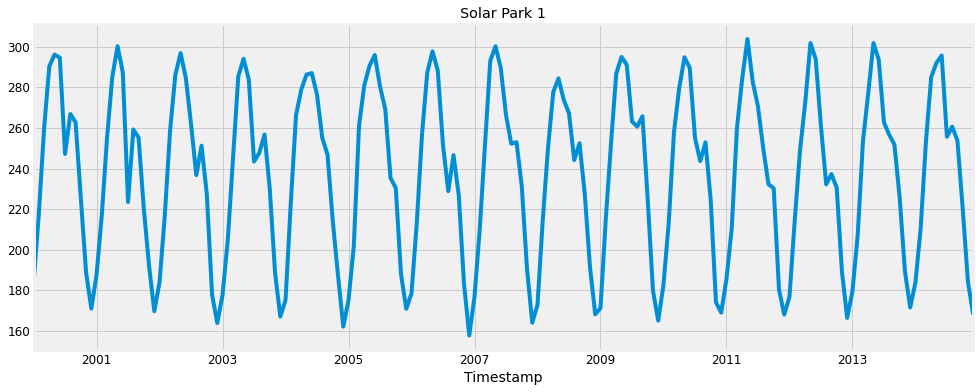

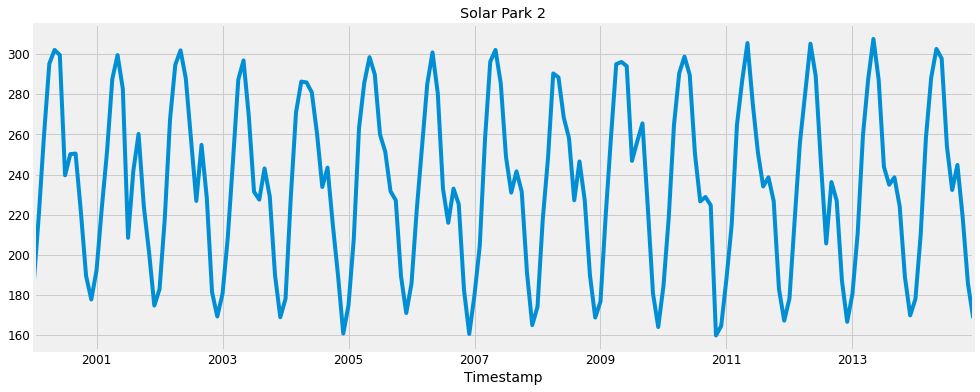

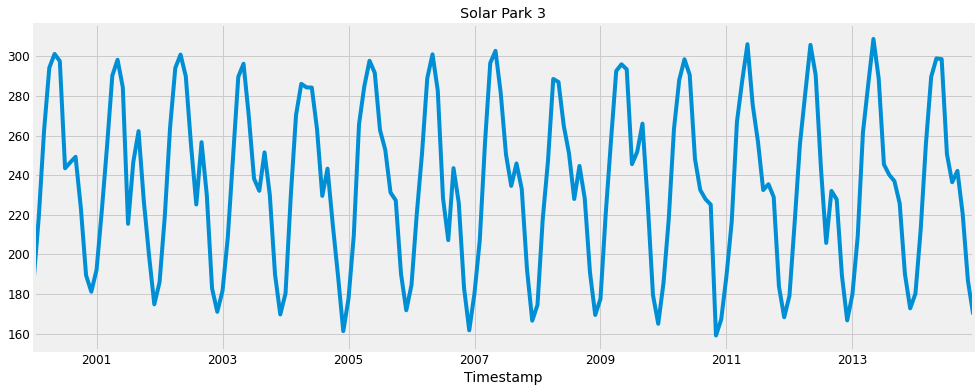

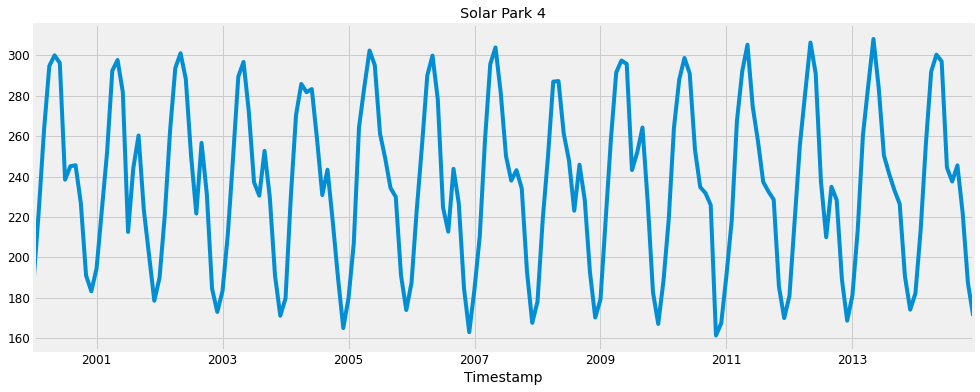

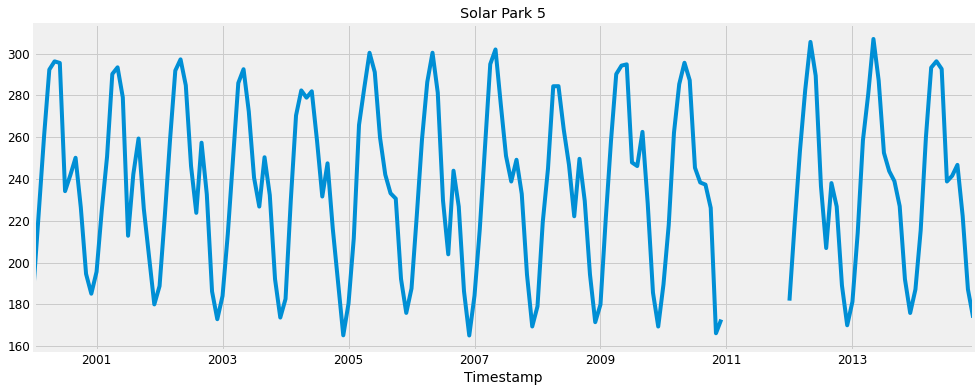

In [ ]:
#fig, axs = plt.subplots(5)
for i in range(5):
  plt.figure(facecolor='white')
  df_list_y[i].plot(figsize=(15,6))
  plt.title('Solar Park ' +str(i+1))
  plt.show()
  

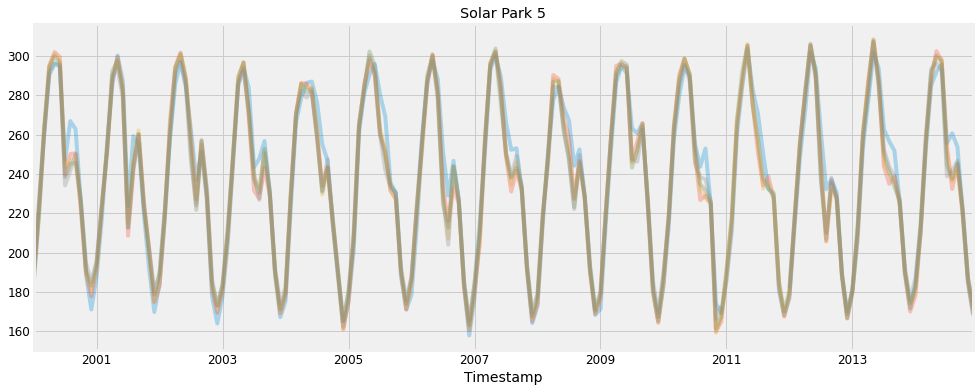

In [ ]:
for i in range(5):
  df_list_y[i].plot(figsize=(15,6), alpha=0.3)
  plt.title('Solar Park ' +str(i+1))

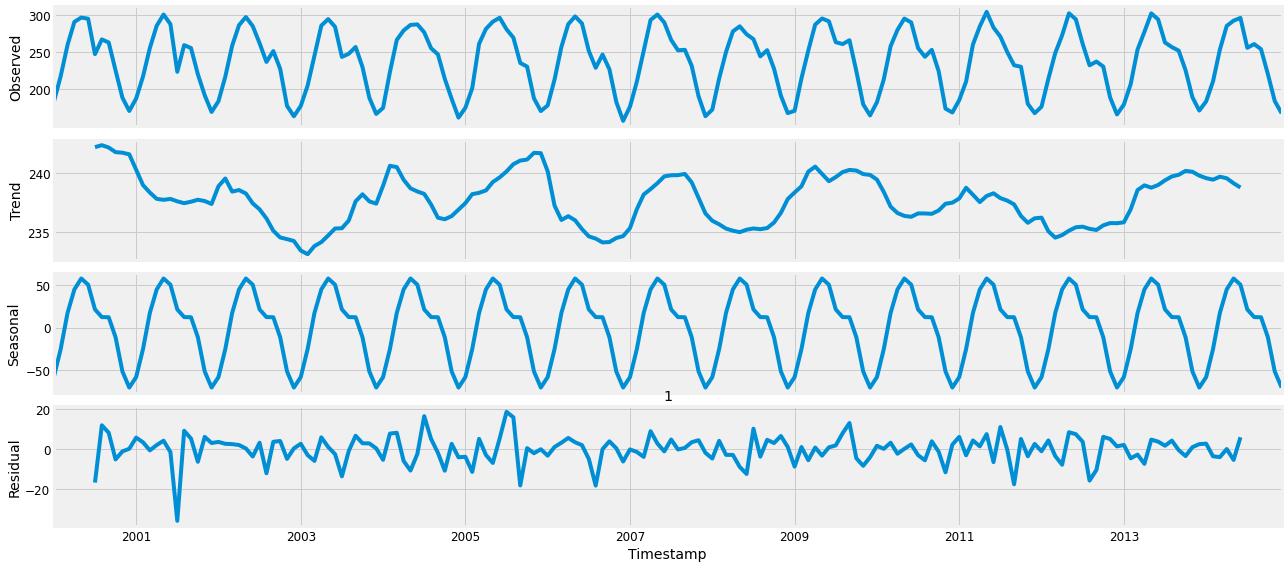

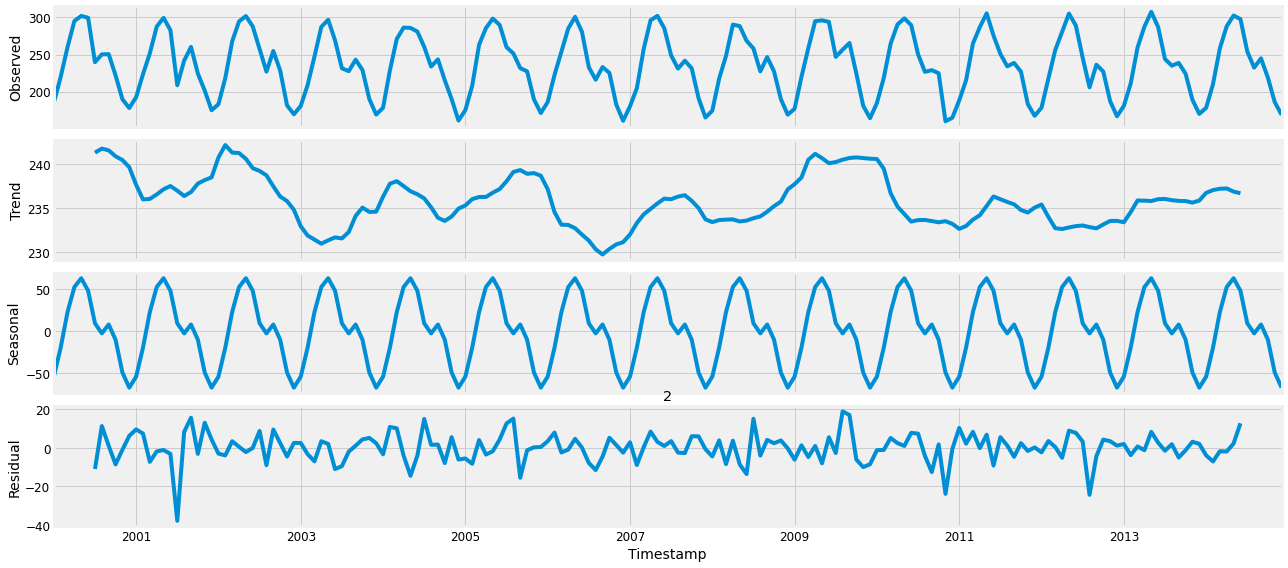

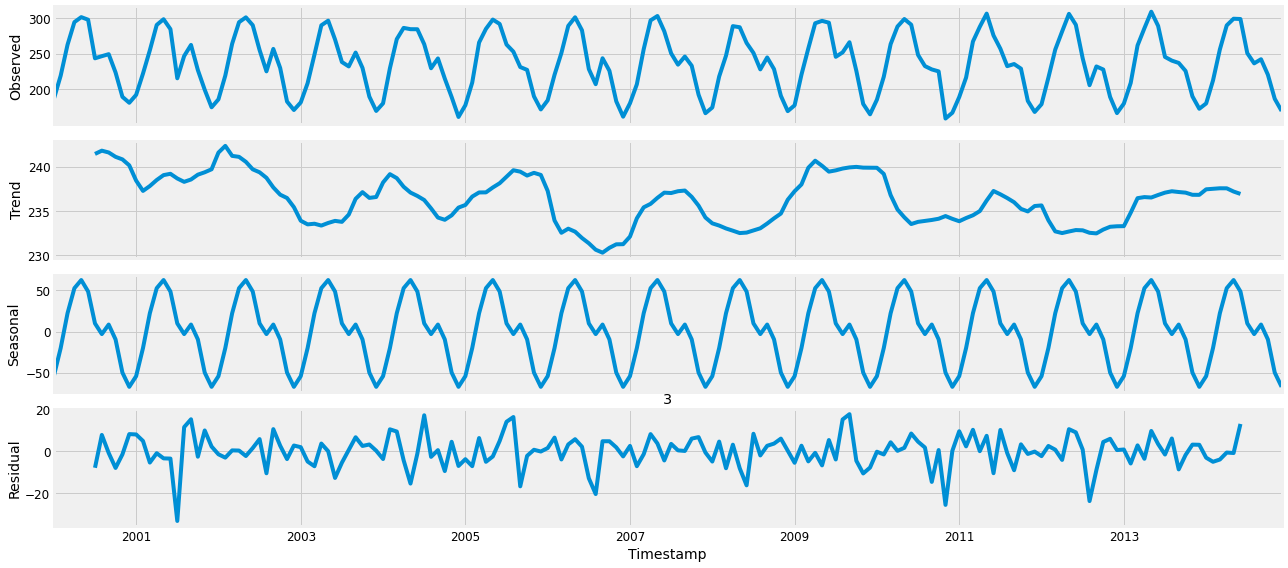

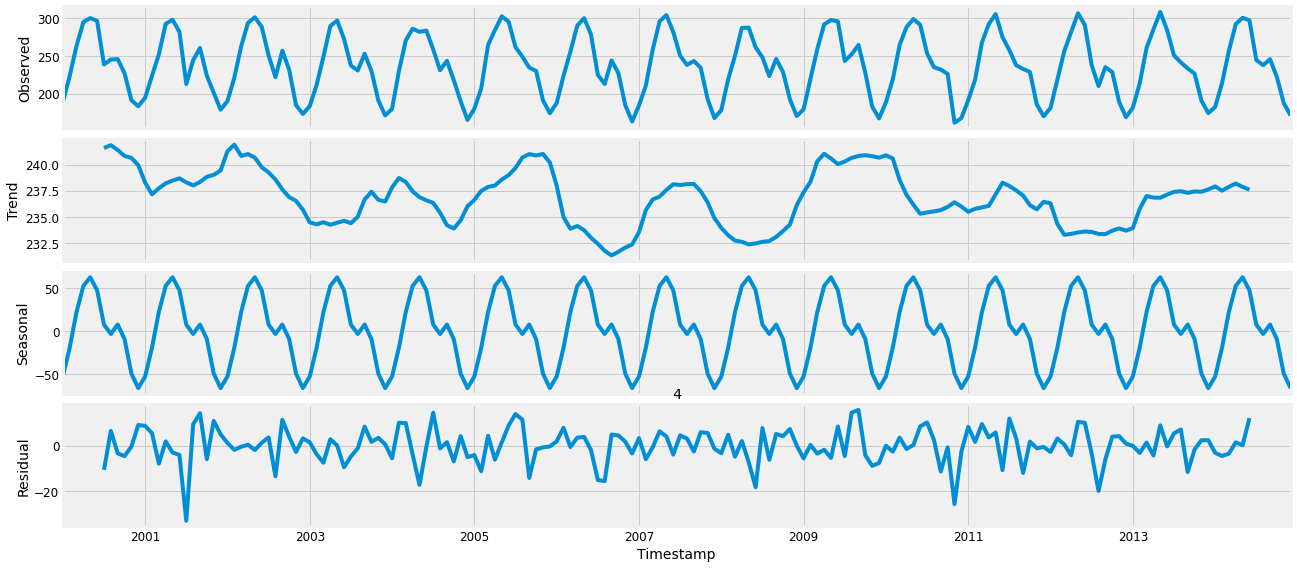

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18,8

for i in range(4):
  decomposition = sm.tsa.seasonal_decompose(df_list_y[i], model='additive')
  #figure(facecolor='red')
  fig = decomposition.plot()
  plt.title(i+1)
  plt.show()


In [ ]:
df_list_y[0].head()


Timestamp
2000-01-01    183.139785
2000-02-01    217.638393
2000-03-01    259.557796
2000-04-01    290.472222
2000-05-01    296.205645
Freq: MS, Name: GHI, dtype: float64

In [ ]:
from statsmodels.tsa.stattools import adfuller
for df in df_list_y:
    X = df.values
    result = adfuller(X)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
	    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.048100
p-value: 0.001179
Critical Values:
	1%: -3.471
	5%: -2.879
	10%: -2.576
ADF Statistic: -3.983547
p-value: 0.001499
Critical Values:
	1%: -3.471
	5%: -2.879
	10%: -2.576
ADF Statistic: -3.717985
p-value: 0.003867
Critical Values:
	1%: -3.471
	5%: -2.879
	10%: -2.576
ADF Statistic: -3.997208
p-value: 0.001425
Critical Values:
	1%: -3.471
	5%: -2.879
	10%: -2.576


MissingDataError: ignored

In [ ]:
df_list_z = list()
for df in df_list:
  df_list_z.append(df['GHI'].resample('W').mean())

for df in df_list_z:
  print(df)

Timestamp
2000-01-02    174.770833
2000-01-09    171.851190
2000-01-16    177.035714
2000-01-23    187.279762
2000-01-30    197.136905
                 ...    
2014-12-07    175.934524
2014-12-14    170.291667
2014-12-21    159.827381
2014-12-28    166.452381
2015-01-04    166.402778
Freq: W-SUN, Name: GHI, Length: 784, dtype: float64
Timestamp
2000-01-02    178.666667
2000-01-09    174.583333
2000-01-16    179.273810
2000-01-23    187.351190
2000-01-30    199.517857
                 ...    
2014-12-07    177.750000
2014-12-14    171.184524
2014-12-21    156.845238
2014-12-28    168.202381
2015-01-04    169.638889
Freq: W-SUN, Name: GHI, Length: 784, dtype: float64
Timestamp
2000-01-02    178.895833
2000-01-09    178.119048
2000-01-16    180.892857
2000-01-23    186.744048
2000-01-30    199.928571
                 ...    
2014-12-07    178.458333
2014-12-14    171.827381
2014-12-21    157.101190
2014-12-28    170.654762
2015-01-04    171.430556
Freq: W-SUN, Name: GHI, Length: 784, dtyp

In [ ]:
#fig, axs = plt.subplots(5)
for i in range(5):
  plt.figure(facecolor='white')
  df_list_z[i].plot(figsize=(15,6))
  plt.title('Solar Park ' +str(i+1))
  plt.show()

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18,8

for i in range(4):
  decomposition = sm.tsa.seasonal_decompose(df_list_z[i], model='additive')
  #figure(facecolor='red')
  fig = decomposition.plot()
  plt.title(i+1)
  plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
for df in df_list_z:
    X = df.values
    result = adfuller(X)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
	    print('\t%s: %.3f' % (key, value))

In [ ]:
#Special analysis of solar park 5
url = url_prefix_list[4]
df_s5_list = list()
for year in range(2000,2015):
    # print(url_prefix_string + str(year) + '')
    try:
        df_temp = pd.read_csv(url + str(year) + '.csv', skiprows=range(0,2))
      
    #   if year == 2000:
        df_s5_list.append(df_temp)

          
    except HTTPError:
        df_temp = pd.DataFrame()
        df_s5_list.append(df_temp)
        continue

In [ ]:
df_s5_list

[      Year  Month  Day  ...  Snow Depth  Wind Speed  Unnamed: 18
 0     2000      1    1  ...           0    3.545393          NaN
 1     2000      1    1  ...           0    3.308511          NaN
 2     2000      1    1  ...           0    3.042415          NaN
 3     2000      1    1  ...           0    2.835397          NaN
 4     2000      1    1  ...           0    2.687339          NaN
 ...    ...    ...  ...  ...         ...         ...          ...
 8755  2000     12   31  ...           0    3.620576          NaN
 8756  2000     12   31  ...           0    3.853300          NaN
 8757  2000     12   31  ...           0    3.924610          NaN
 8758  2000     12   31  ...           0    3.878298          NaN
 8759  2000     12   31  ...           0    3.746383          NaN
 
 [8760 rows x 19 columns],
       Year  Month  Day  ...  Snow Depth  Wind Speed  Unnamed: 18
 0     2001      1    1  ...           0    3.198709          NaN
 1     2001      1    1  ...           0    3.0

In [ ]:
df_p5_list = list()
for df in df_s5_list:
    if df.empty:
        df_p5_list.append(df)
    else:
        df_p5_list.append(df[columns])

In [ ]:
df_p5_list

[      Year  Month  Day  Hour  GHI
 0     2000      1    1     0    0
 1     2000      1    1     1    0
 2     2000      1    1     2    0
 3     2000      1    1     3    0
 4     2000      1    1     4    0
 ...    ...    ...  ...   ...  ...
 8755  2000     12   31    19    0
 8756  2000     12   31    20    0
 8757  2000     12   31    21    0
 8758  2000     12   31    22    0
 8759  2000     12   31    23    0
 
 [8760 rows x 5 columns],       Year  Month  Day  Hour  GHI
 0     2001      1    1     0    0
 1     2001      1    1     1    0
 2     2001      1    1     2    0
 3     2001      1    1     3    0
 4     2001      1    1     4    0
 ...    ...    ...  ...   ...  ...
 8755  2001     12   31    19    0
 8756  2001     12   31    20    0
 8757  2001     12   31    21    0
 8758  2001     12   31    22    0
 8759  2001     12   31    23    0
 
 [8760 rows x 5 columns],       Year  Month  Day  Hour  GHI
 0     2002      1    1     0    0
 1     2002      1    1     1    0
 

In [ ]:
df_p5_list[11] = df_p5_list[0].copy(deep=True)
df_p5_list[11].dtypes

Year     int64
Month    int64
Day      int64
Hour     int64
GHI      int64
dtype: object

In [ ]:
df_p5_list[11][df_p5_list[11]['GHI'] > 0]

Year  Month  Day  Hour  GHI
8     2000      1    1     8  151
9     2000      1    1     9  357
10    2000      1    1    10  530
11    2000      1    1    11  633
12    2000      1    1    12  683
...    ...    ...  ...   ...  ...
8749  2000     12   31    13  690
8750  2000     12   31    14  603
8751  2000     12   31    15  455
8752  2000     12   31    16  263
8753  2000     12   31    17   41

[4327 rows x 5 columns]

In [ ]:
# df_p5_list[11]['GHI'].values[:] = 0
df_p5_list[11]['Year'].values[:] = 2011
# df_p5_list[11]

In [ ]:
for i in range(1, len(df_p5_list)):
    for j in range(df_p5_list[11]['GHI'].shape[0]):
        df_p5_list[11]['GHI'][j] = df_p5_list[11]['GHI'][j] * df_p5_list[i]['GHI'][j]

In [ ]:
# df_p5_list[11]['GHI'] = df_p5_list[11]['GHI'].div(14).round(1)
for i in range(df_p5_list[11]['GHI'].shape[0]):
    df_p5_list[11]['GHI'][i] = df_p5_list[11]['GHI'][i]**(1/float(14))


In [ ]:
df_p5_list[11][df_p5_list[11]['GHI'] > 0]

Year  Month  Day  Hour        GHI
10    2011      1    1    10  21.924754
11    2011      1    1    11  22.368633
12    2011      1    1    12  22.410070
13    2011      1    1    13  21.502109
17    2011      1    1    17  19.689622
...    ...    ...  ...   ...        ...
8746  2011     12   31    10  21.227677
8749  2011     12   31    13  22.524866
8750  2011     12   31    14  22.219335
8752  2011     12   31    16  22.609104
8753  2011     12   31    17  22.580194

[2153 rows x 5 columns]

In [ ]:
df_p5_list[0]

Year  Month  Day  Hour  GHI
0     2000      1    1     0    0
1     2000      1    1     1    0
2     2000      1    1     2    0
3     2000      1    1     3    0
4     2000      1    1     4    0
...    ...    ...  ...   ...  ...
8755  2000     12   31    19    0
8756  2000     12   31    20    0
8757  2000     12   31    21    0
8758  2000     12   31    22    0
8759  2000     12   31    23    0

[8760 rows x 5 columns]

In [ ]:
df_5 = df_p5_list[0].copy(deep=True)
for i in range(1, 15):
    df_5 = df_5.append(df_p5_list[i].iloc[1:])

df_5[df_5['GHI'] > 0]

Year  Month  Day  Hour    GHI
8     2000      1    1     8  151.0
9     2000      1    1     9  357.0
10    2000      1    1    10  530.0
11    2000      1    1    11  633.0
12    2000      1    1    12  683.0
...    ...    ...  ...   ...    ...
8749  2014     12   31    13  660.0
8750  2014     12   31    14  574.0
8751  2014     12   31    15  429.0
8752  2014     12   31    16  242.0
8753  2014     12   31    17   29.0

[62758 rows x 5 columns]

In [ ]:
df_5.reset_index(drop=True, inplace=True)
df_5[df_5['GHI']>0]

Year  Month  Day  Hour    GHI
8       2000      1    1     8  151.0
9       2000      1    1     9  357.0
10      2000      1    1    10  530.0
11      2000      1    1    11  633.0
12      2000      1    1    12  683.0
...      ...    ...  ...   ...    ...
131375  2014     12   31    13  660.0
131376  2014     12   31    14  574.0
131377  2014     12   31    15  429.0
131378  2014     12   31    16  242.0
131379  2014     12   31    17   29.0

[62758 rows x 5 columns]

In [ ]:
df_temp2 = pd.DataFrame(pd.to_datetime(df_5[['Year','Month','Day','Hour']]), columns=['Timestamp'])
df_temp2 = df_temp2.join(df_5)

In [ ]:
df_temp2[df_temp2['Year']==2011]

Timestamp  Year  Month  Day  Hour  GHI
96350  2011-01-01 01:00:00  2011      1    1     1  0.0
96351  2011-01-01 02:00:00  2011      1    1     2  0.0
96352  2011-01-01 03:00:00  2011      1    1     3  0.0
96353  2011-01-01 04:00:00  2011      1    1     4  0.0
96354  2011-01-01 05:00:00  2011      1    1     5  0.0
...                    ...   ...    ...  ...   ...  ...
105104 2011-12-31 19:00:00  2011     12   31    19  0.0
105105 2011-12-31 20:00:00  2011     12   31    20  0.0
105106 2011-12-31 21:00:00  2011     12   31    21  0.0
105107 2011-12-31 22:00:00  2011     12   31    22  0.0
105108 2011-12-31 23:00:00  2011     12   31    23  0.0

[8759 rows x 6 columns]

In [ ]:
df_temp2 = df_temp2.set_index('Timestamp')

In [ ]:
df_temp2

Year  Month  Day  Hour  GHI
Timestamp                                       
2000-01-01 00:00:00  2000      1    1     0  0.0
2000-01-01 01:00:00  2000      1    1     1  0.0
2000-01-01 02:00:00  2000      1    1     2  0.0
2000-01-01 03:00:00  2000      1    1     3  0.0
2000-01-01 04:00:00  2000      1    1     4  0.0
...                   ...    ...  ...   ...  ...
2014-12-31 19:00:00  2014     12   31    19  0.0
2014-12-31 20:00:00  2014     12   31    20  0.0
2014-12-31 21:00:00  2014     12   31    21  0.0
2014-12-31 22:00:00  2014     12   31    22  0.0
2014-12-31 23:00:00  2014     12   31    23  0.0

[131386 rows x 5 columns]

In [ ]:
# df_5_y
# df_list_y = list()
# for df in df_list:
#   df_list_y.append(df['GHI'].resample('MS').mean())

# for df in df_list_y:
#   print(df)

df_5_y = df_temp2['GHI'].resample('MS').mean()

In [ ]:
df_5_y

Timestamp
2000-01-01    188.220430
2000-02-01    224.718750
2000-03-01    260.489247
2000-04-01    292.340278
2000-05-01    296.288978
                 ...    
2014-08-01    241.518817
2014-09-01    246.745833
2014-10-01    222.237903
2014-11-01    187.176389
2014-12-01    173.583333
Freq: MS, Name: GHI, Length: 180, dtype: float64

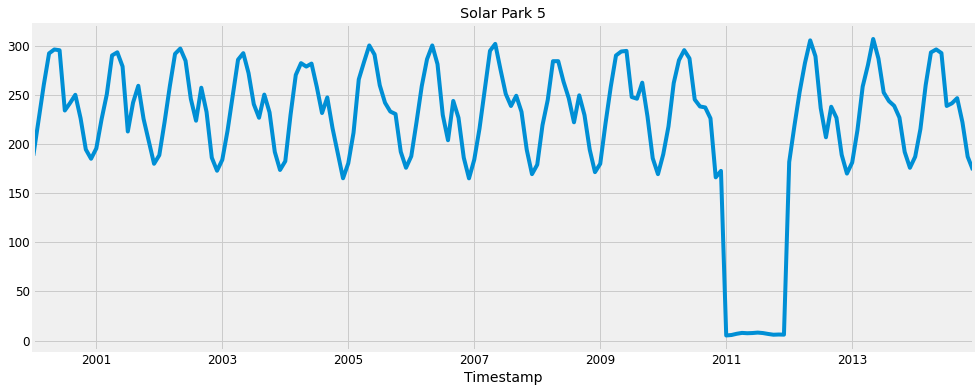

In [ ]:
plt.figure(facecolor='white')
df_5_y.plot(figsize=(15,6))
plt.title('Solar Park 5')
plt.show()